In [61]:
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets
# concatenate X and y
data = pd.concat([X, y], axis=1)
# save data to csv
data.to_csv('adult.csv', index=False)
# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

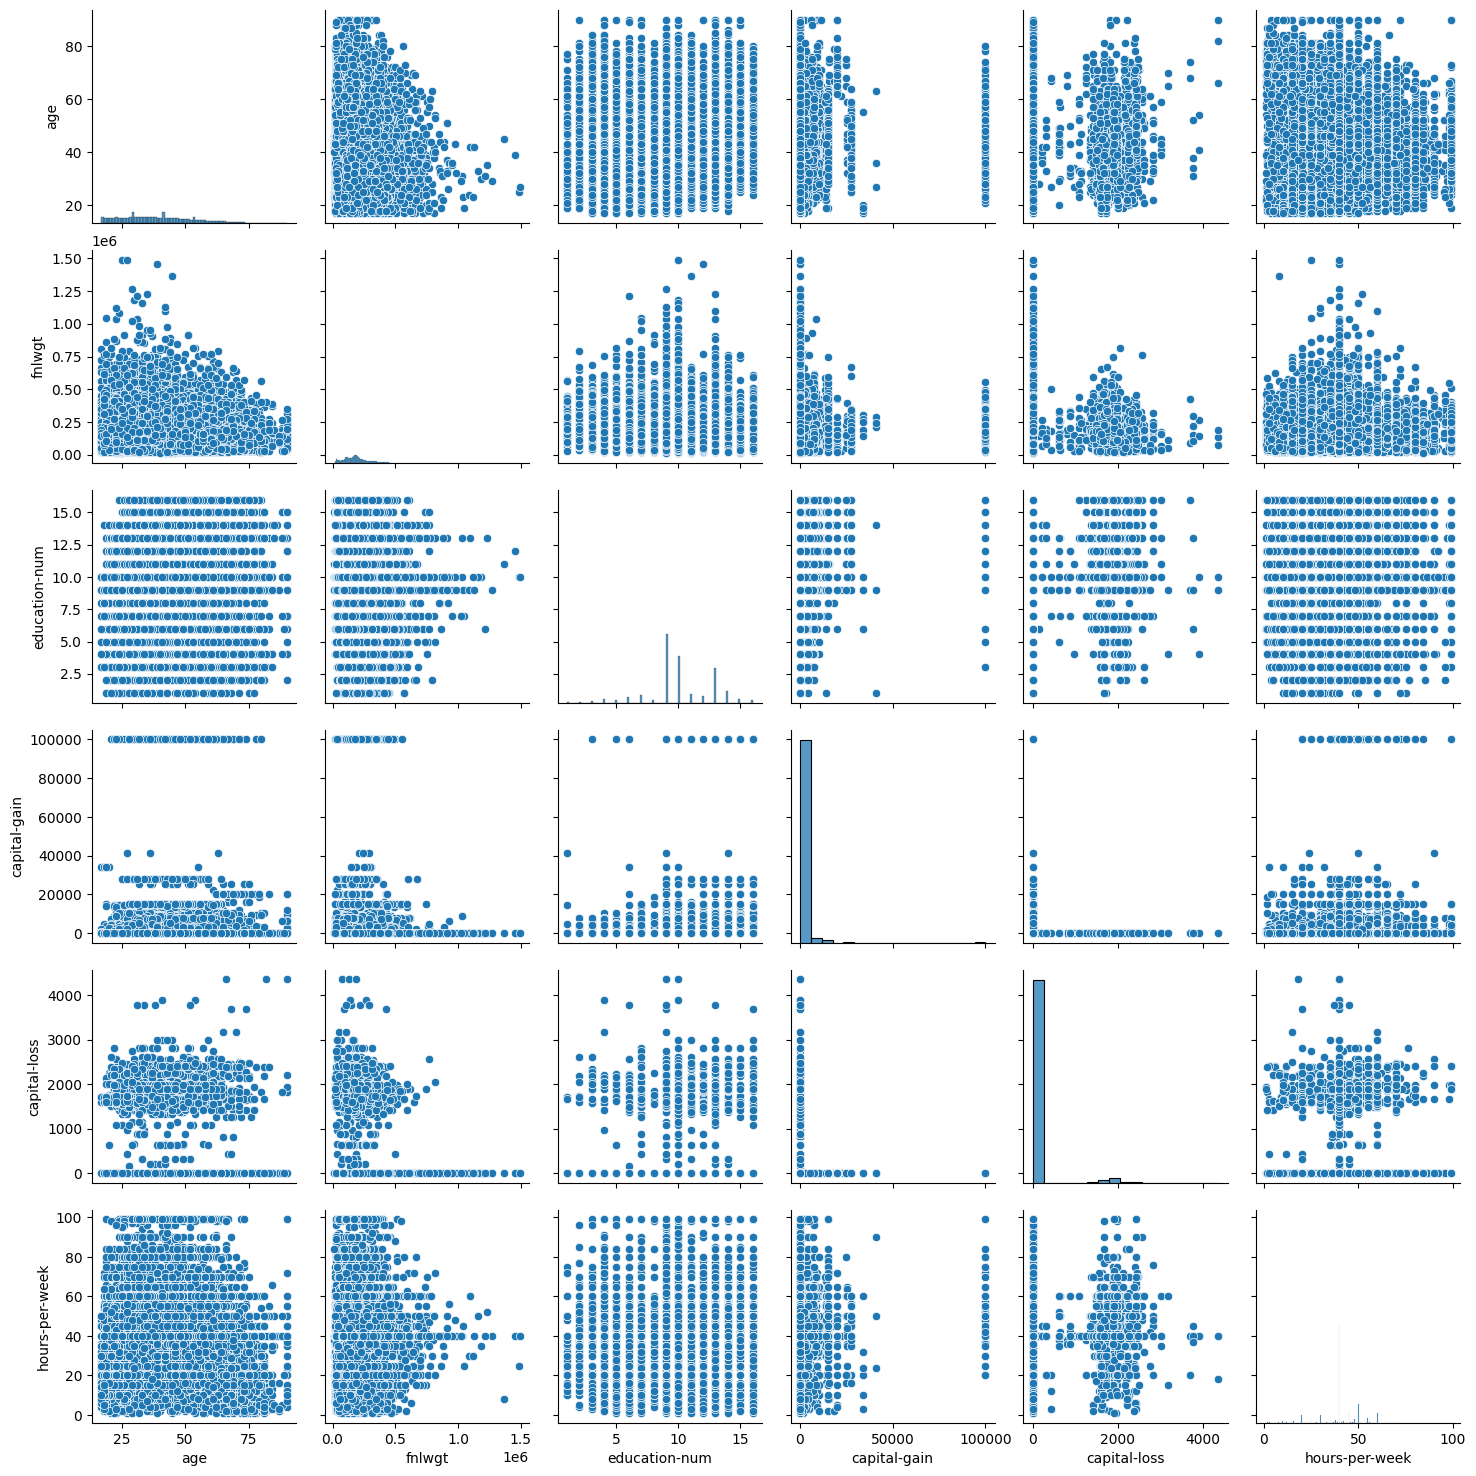

In [3]:
# pairplot of the dataset
sns.pairplot(X)
plt.show()

In [4]:
# choose categorical data and dummy it into numerical data
X = pd.get_dummies(X, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship','race','native-country'])

    age workclass  fnlwgt     education  education-num         marital-status  \
14   40   Private  121772     Assoc-voc             11     Married-civ-spouse   
27   54         ?  180211  Some-college             10     Married-civ-spouse   
38   31   Private   84154  Some-college             10     Married-civ-spouse   
51   18   Private  226956       HS-grad              9          Never-married   
61   32         ?  293936       7th-8th              4  Married-spouse-absent   

       occupation   relationship                race     sex  capital-gain  \
14   Craft-repair        Husband  Asian-Pac-Islander    Male             0   
27              ?        Husband  Asian-Pac-Islander    Male             0   
38          Sales        Husband               White    Male             0   
51  Other-service      Own-child               White  Female             0   
61              ?  Not-in-family               White    Male             0   

    capital-loss  hours-per-week native-coun

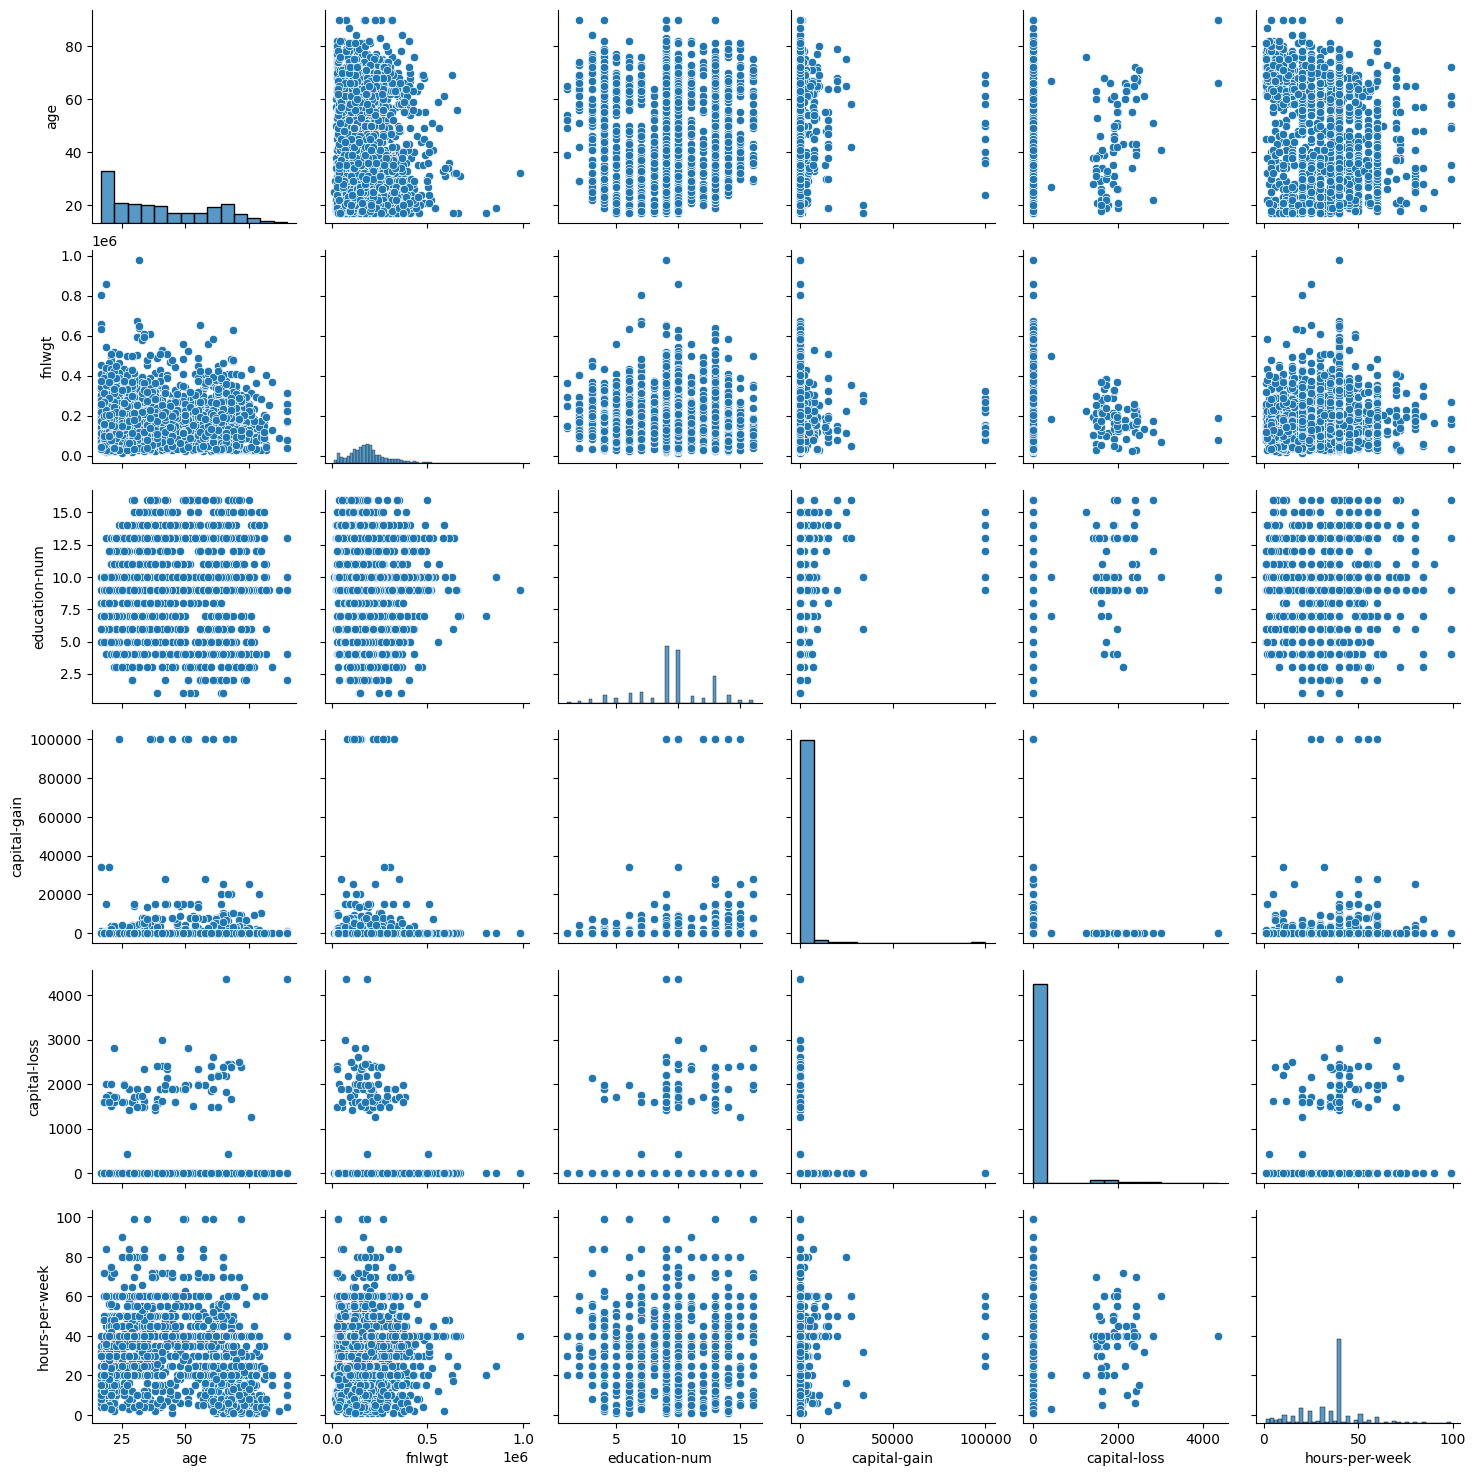

In [44]:
#summary on which rows with "?" in it
print(data[data.isin(['?']).any(axis=1)].head())

# extract the rows with "?" in it
data = data[data.isin(['?']).any(axis=1)]
data.to_csv('missing_data.csv', index=False)
# plot on data with missing values
sns.pairplot(data)
plt.show()

In [62]:
# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets
# concatenate X and y
adult_data = pd.concat([X, y], axis=1)

KeyboardInterrupt: 

In [64]:
adult_data = pd.read_csv('adult.csv')

In [65]:
# delete the "." after the values in "income" column
adult_data['income'] = adult_data['income'].str.replace('.', '')

In [66]:
# Create a new feature 'age_group' to categorize ages into bins for better visualization
adult_data['age_group'] = pd.cut(adult_data['age'], bins=[0, 25, 35, 45, 55, 65, 75, 85, 100], 
                                 labels=['0-25', '25-35', '35-45', '45-55', '55-65', '65-75', '75-85', '85-100'])

In [67]:
# Define the new color palette with the provided HEX codes
updated_palette = {"<=50K": '#ea3455', ">50K": '#388bf3'}

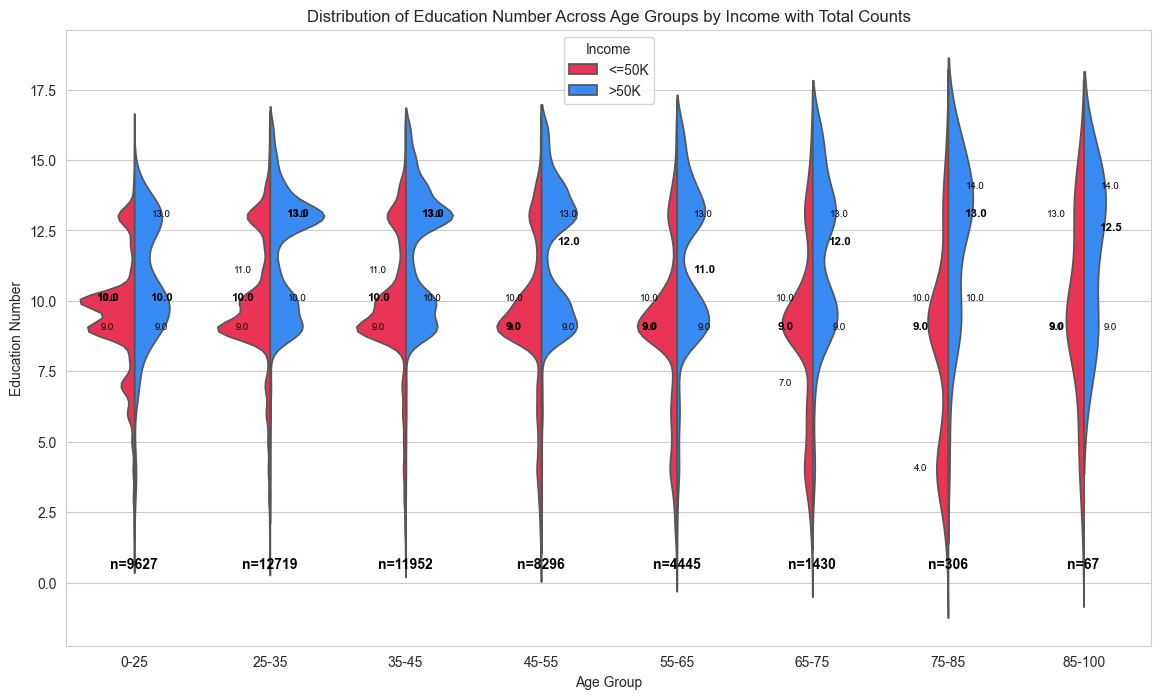

In [68]:
# Plot the violin plot again with updated colors and annotations
plt.figure(figsize=(14, 8))
violin = sns.violinplot(x='age_group', y='education-num', hue='income', data=adult_data, 
                        palette=updated_palette, split=True, inner=None, saturation=1)

# Calculate and annotate the total number of people in each age group
age_group_counts = adult_data['age_group'].value_counts(sort=False)

# Add annotations for the total counts
for i, age_group in enumerate(age_groups):
    count = age_group_counts[age_group]
    plt.text(i, adult_data['education-num'].min() - 0.5, f'n={count}', 
             horizontalalignment='center', size='medium', color='black', weight='bold')

# Annotate the median and IQR for each violin segment
for i, age_group in enumerate(age_groups):
    for j, income_group in enumerate(income_groups):
        # Subset to the particular age and income group
        subset = adult_data[(adult_data['age_group'] == age_group) & 
                            (adult_data['income'] == income_group)]
        
        # Calculate median and quartiles
        median = subset['education-num'].median()
        quartile1 = subset['education-num'].quantile(0.25)
        quartile3 = subset['education-num'].quantile(0.75)
        
        # Determine position for annotation
        if income_group == '<=50K':
            position = i - 0.2
        else:
            position = i + 0.2
        
        # Annotate the median
        plt.text(position, median, f"{median}", horizontalalignment='center', size='small', color='black', weight='bold')
        
        # Annotate the IQR
        plt.text(position, quartile1, f"{quartile1}", horizontalalignment='center', size='x-small', color='black')
        plt.text(position, quartile3, f"{quartile3}", horizontalalignment='center', size='x-small', color='black')

# Finalize the plot
plt.title('Distribution of Education Number Across Age Groups by Income with Total Counts')
plt.xlabel('Age Group')
plt.ylabel('Education Number')
plt.legend(title='Income', loc='upper center')
plt.show()